In [2]:
import csv
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import seaborn as sns


In [3]:
df = pd.read_csv('./age.csv', encoding='utf-8')
df

,年月,地區,產業別,性別,年齡層,信用卡交易筆數,信用卡交易金額[新台幣]
0,201401,10007000,衣,2,未滿20歲,282,574794
1,201401,10007000,衣,2,20(含)-25歲,7091,16563668
2,201401,10007000,衣,2,25(含)-30歲,20467,52197577
3,201401,10007000,衣,2,30(含)-35歲,35400,93635594
4,201401,10007000,衣,2,35(含)-40歲,41102,113811652
...,...,...,...,...,...,...,...
500187,202308,67000000,其他,1,60(含)-65歲,5961,29661357
500188,202308,67000000,其他,1,65(含)-70歲,3808,21203594
500189,202308,67000000,其他,1,70(含)-75歲,2213,12924404
500190,202308,67000000,其他,1,75(含)-80歲,680,4171218


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500192 entries, 0 to 500191
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   年月            500192 non-null  int64 
 1   地區            500192 non-null  int64 
 2   產業別           500192 non-null  object
 3   性別            500192 non-null  int64 
 4   年齡層           500192 non-null  object
 5   信用卡交易筆數       500192 non-null  int64 
 6   信用卡交易金額[新台幣]  500192 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 26.7+ MB


In [5]:
df.describe(include='all')

,年月,地區,產業別,性別,年齡層,信用卡交易筆數,信用卡交易金額[新台幣]
count,500192.000000,5.001920e+05,500192,500192.0,500192,5.001920e+05,5.001920e+05
unique,NaN,NaN,7,NaN,14,NaN,NaN
top,NaN,NaN,衣,NaN,未滿20歲,NaN,NaN
freq,NaN,NaN,71456,NaN,35728,NaN,NaN
mean,201840.844828,2.505386e+07,NaN,1.5,NaN,2.222383e+04,4.447021e+07
std,279.293278,2.478577e+07,NaN,0.5,NaN,1.270565e+05,2.986701e+08
min,201401.000000,9.007000e+06,NaN,1.0,NaN,-7.000000e+00,-9.275543e+07
25%,201605.750000,1.000700e+07,NaN,1.0,NaN,1.880000e+02,4.370198e+05
50%,201810.500000,1.001450e+07,NaN,1.5,NaN,1.344000e+03,3.253022e+06
75%,202103.250000,6.300000e+07,NaN,2.0,NaN,6.842000e+03,1.426566e+07


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500192 entries, 0 to 500191
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   年月            500192 non-null  int64 
 1   地區            500192 non-null  int64 
 2   產業別           500192 non-null  object
 3   性別            500192 non-null  int64 
 4   年齡層           500192 non-null  object
 5   信用卡交易筆數       500192 non-null  int64 
 6   信用卡交易金額[新台幣]  500192 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 26.7+ MB


In [7]:
#檢視資料是否重覆
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
500187    False
500188    False
500189    False
500190    False
500191    False
Length: 500192, dtype: bool

觀察下載之檔案資料共有500192 rows × 7 columns,"年月"、"地區"、"性別"資料型態為int64，
為資料呈現時便利性，將以下變更:
-1.年、月分別以個欄位呈現
-2.地區依資料來源單位提供之對應地區呈現
-3.性別改以文字呈現
修正後之資料另儲存為age_trans.csv

In [8]:

df = pd.read_csv('./age_trans.csv')
df

,年,月,地區,產業別,性別,年齡層,信用卡交易筆數,信用卡交易金額[新台幣]
0,2014,1,彰化縣,衣,女性,未滿20歲,282,574794
1,2014,1,彰化縣,衣,女性,20(含)-25歲,7091,16563668
2,2014,1,彰化縣,衣,女性,25(含)-30歲,20467,52197577
3,2014,1,彰化縣,衣,女性,30(含)-35歲,35400,93635594
4,2014,1,彰化縣,衣,女性,35(含)-40歲,41102,113811652
...,...,...,...,...,...,...,...,...
500187,2023,8,臺南市,其他,男性,60(含)-65歲,5961,29661357
500188,2023,8,臺南市,其他,男性,65(含)-70歲,3808,21203594
500189,2023,8,臺南市,其他,男性,70(含)-75歲,2213,12924404
500190,2023,8,臺南市,其他,男性,75(含)-80歲,680,4171218


In [9]:
df.describe(include='all')

,年,月,地區,產業別,性別,年齡層,信用卡交易筆數,信用卡交易金額[新台幣]
count,500192.000000,500192.000000,500192,500192,500192,500192,5.001920e+05,5.001920e+05
unique,NaN,NaN,22,7,2,14,NaN,NaN
top,NaN,NaN,彰化縣,衣,女性,未滿20歲,NaN,NaN
freq,NaN,NaN,22736,71456,250096,35728,NaN,NaN
mean,2018.344828,6.362069,NaN,NaN,NaN,NaN,2.222383e+04,4.447021e+07
std,2.795021,3.422537,NaN,NaN,NaN,NaN,1.270565e+05,2.986701e+08
min,2014.000000,1.000000,NaN,NaN,NaN,NaN,-7.000000e+00,-9.275543e+07
25%,2016.000000,3.000000,NaN,NaN,NaN,NaN,1.880000e+02,4.370198e+05
50%,2018.000000,6.000000,NaN,NaN,NaN,NaN,1.344000e+03,3.253022e+06
75%,2021.000000,9.000000,NaN,NaN,NaN,NaN,6.842000e+03,1.426566e+07


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500192 entries, 0 to 500191
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   年             500192 non-null  int64 
 1   月             500192 non-null  int64 
 2   地區            500192 non-null  object
 3   產業別           500192 non-null  object
 4   性別            500192 non-null  object
 5   年齡層           500192 non-null  object
 6   信用卡交易筆數       500192 non-null  int64 
 7   信用卡交易金額[新台幣]  500192 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 30.5+ MB


In [11]:
df.describe(include='all')

,年,月,地區,產業別,性別,年齡層,信用卡交易筆數,信用卡交易金額[新台幣]
count,500192.000000,500192.000000,500192,500192,500192,500192,5.001920e+05,5.001920e+05
unique,NaN,NaN,22,7,2,14,NaN,NaN
top,NaN,NaN,彰化縣,衣,女性,未滿20歲,NaN,NaN
freq,NaN,NaN,22736,71456,250096,35728,NaN,NaN
mean,2018.344828,6.362069,NaN,NaN,NaN,NaN,2.222383e+04,4.447021e+07
std,2.795021,3.422537,NaN,NaN,NaN,NaN,1.270565e+05,2.986701e+08
min,2014.000000,1.000000,NaN,NaN,NaN,NaN,-7.000000e+00,-9.275543e+07
25%,2016.000000,3.000000,NaN,NaN,NaN,NaN,1.880000e+02,4.370198e+05
50%,2018.000000,6.000000,NaN,NaN,NaN,NaN,1.344000e+03,3.253022e+06
75%,2021.000000,9.000000,NaN,NaN,NaN,NaN,6.842000e+03,1.426566e+07


In [12]:
#檢視是有空值
df.isnull()

,年,月,地區,產業別,性別,年齡層,信用卡交易筆數,信用卡交易金額[新台幣]
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
500187,False,False,False,False,False,False,False,False
500188,False,False,False,False,False,False,False,False
500189,False,False,False,False,False,False,False,False
500190,False,False,False,False,False,False,False,False


In [13]:
df

,年,月,地區,產業別,性別,年齡層,信用卡交易筆數,信用卡交易金額[新台幣]
0,2014,1,彰化縣,衣,女性,未滿20歲,282,574794
1,2014,1,彰化縣,衣,女性,20(含)-25歲,7091,16563668
2,2014,1,彰化縣,衣,女性,25(含)-30歲,20467,52197577
3,2014,1,彰化縣,衣,女性,30(含)-35歲,35400,93635594
4,2014,1,彰化縣,衣,女性,35(含)-40歲,41102,113811652
...,...,...,...,...,...,...,...,...
500187,2023,8,臺南市,其他,男性,60(含)-65歲,5961,29661357
500188,2023,8,臺南市,其他,男性,65(含)-70歲,3808,21203594
500189,2023,8,臺南市,其他,男性,70(含)-75歲,2213,12924404
500190,2023,8,臺南市,其他,男性,75(含)-80歲,680,4171218


              信用卡交易筆數  信用卡交易金額[新台幣]
信用卡交易筆數       1.00000       0.68617
信用卡交易金額[新台幣]  0.68617       1.00000


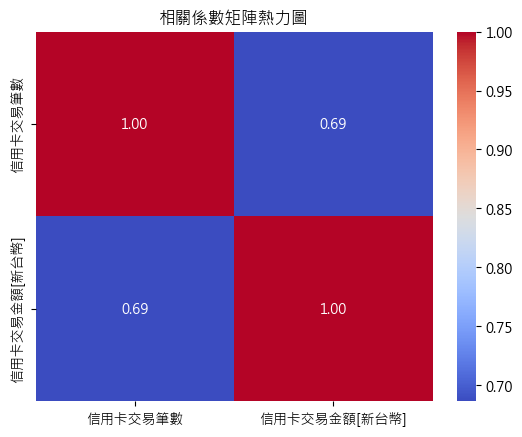

In [14]:
matplotlib.rc('font', family='Microsoft JhengHei')
selected_columns = ['信用卡交易筆數', '信用卡交易金額[新台幣]']
selected_data = df[selected_columns]
correlation_matrix = selected_data.corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('相關係數矩陣熱力圖')
plt.show()

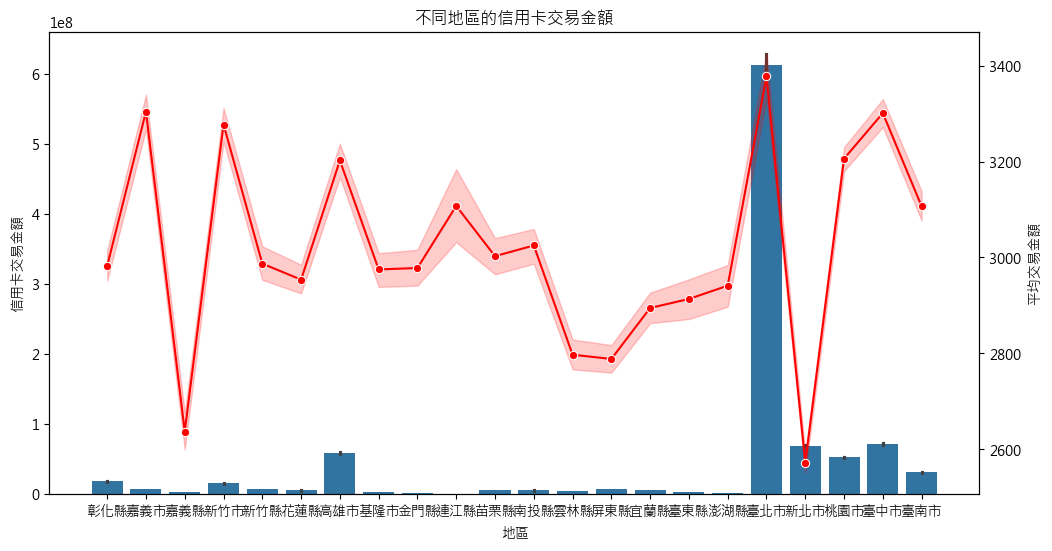

In [28]:
#依區域進行分析
plt.figure(figsize=(12, 6))
sns.barplot(x='地區', y='信用卡交易金額[新台幣]', data=df)
plt.title('不同地區的信用卡交易金額')
plt.xlabel('地區')
plt.ylabel('信用卡交易金額')
ax2 = plt.twinx()
sns.lineplot(x='地區', y='平均交易金額', data=df, color='red', marker='o', ax=ax2)
ax2.set_ylabel('平均交易金額')
plt.show()

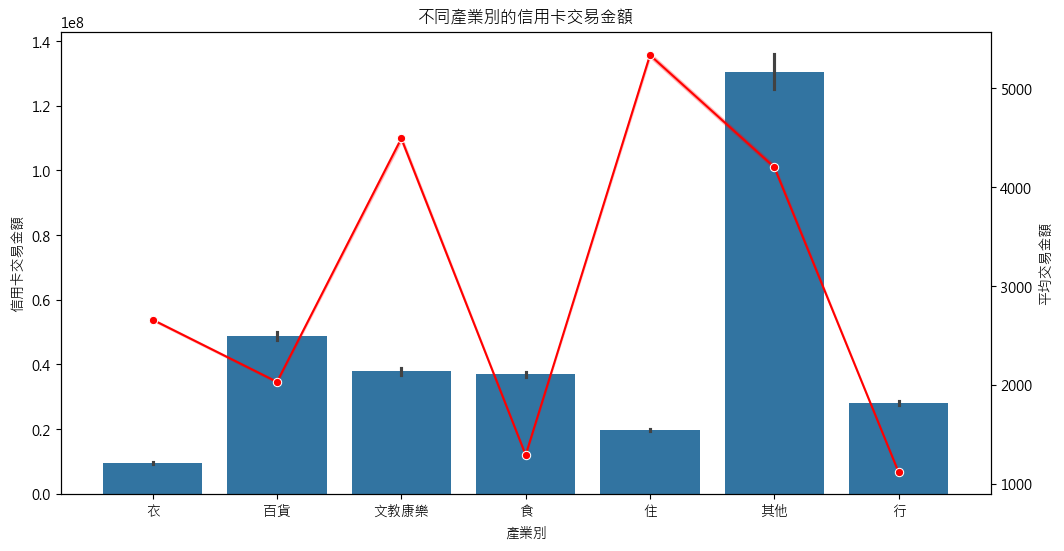

In [24]:
#依產業別分析
df['平均交易金額'] = df['信用卡交易金額[新台幣]'] / df['信用卡交易筆數']
plt.figure(figsize=(12, 6))
sns.barplot(x='產業別', y='信用卡交易金額[新台幣]', data=df)
plt.title('不同產業別的信用卡交易金額')
plt.xlabel('產業別')
plt.ylabel('信用卡交易金額')

ax2 = plt.twinx()
sns.lineplot(x='產業別', y='平均交易金額', data=df, color='red', marker='o', ax=ax2)
ax2.set_ylabel('平均交易金額')
plt.show()

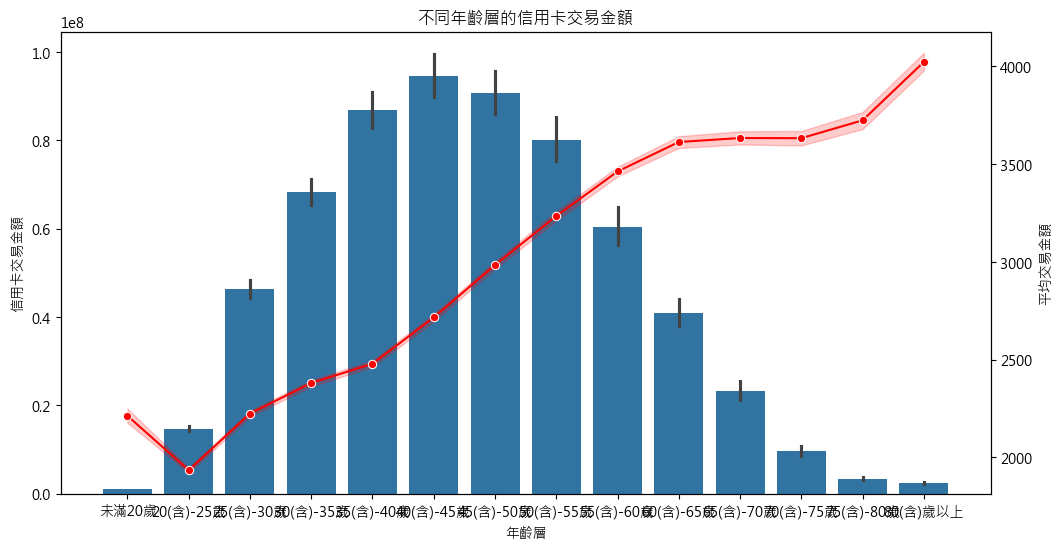

In [25]:
#依年齡層分析
df['平均交易金額'] = df['信用卡交易金額[新台幣]'] / df['信用卡交易筆數']
plt.figure(figsize=(12, 6))
sns.barplot(x='年齡層', y='信用卡交易金額[新台幣]', data=df)
plt.title('不同年齡層的信用卡交易金額')
plt.xlabel('年齡層')
plt.ylabel('信用卡交易金額')
ax2 = plt.twinx()
sns.lineplot(x='年齡層', y='平均交易金額', data=df, color='red', marker='o', ax=ax2)
ax2.set_ylabel('平均交易金額')
plt.show()


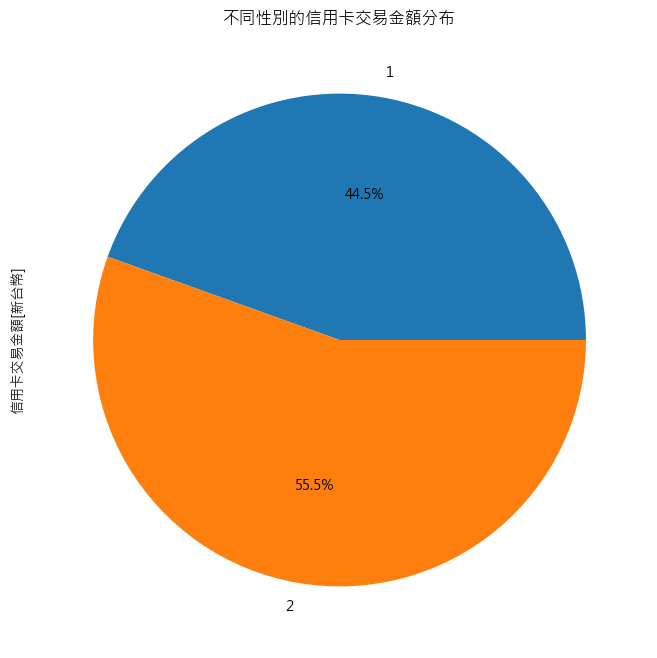

In [23]:
#依性別分析
plt.figure(figsize=(8, 8))
df.groupby('性別')['信用卡交易金額[新台幣]'].sum().plot.pie(autopct='%1.1f%%')
plt.title('不同性別的信用卡交易金額分布')
plt.show()

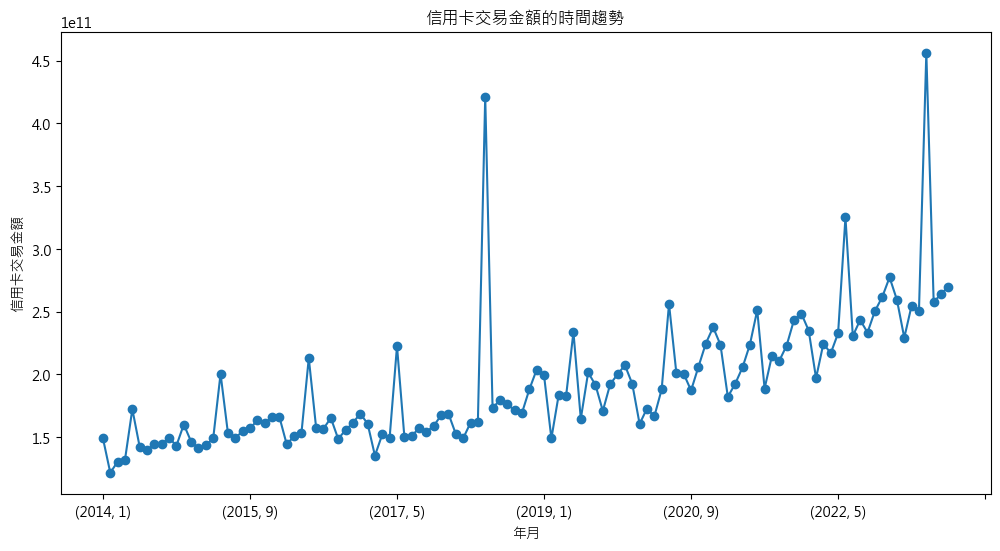

In [20]:
plt.figure(figsize=(12, 6))
df.groupby(['年', '月'])['信用卡交易金額[新台幣]'].sum().plot(marker='o')
plt.title('信用卡交易金額的時間趨勢')
plt.xlabel('年月')
plt.ylabel('信用卡交易金額')
plt.show()

C:\Users\isabe\AppData\Local\Temp\ipykernel_17472\2135203272.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='產業別', y='信用卡交易金額[新台幣]', hue='產業別', data=grouped_data, ci=None)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


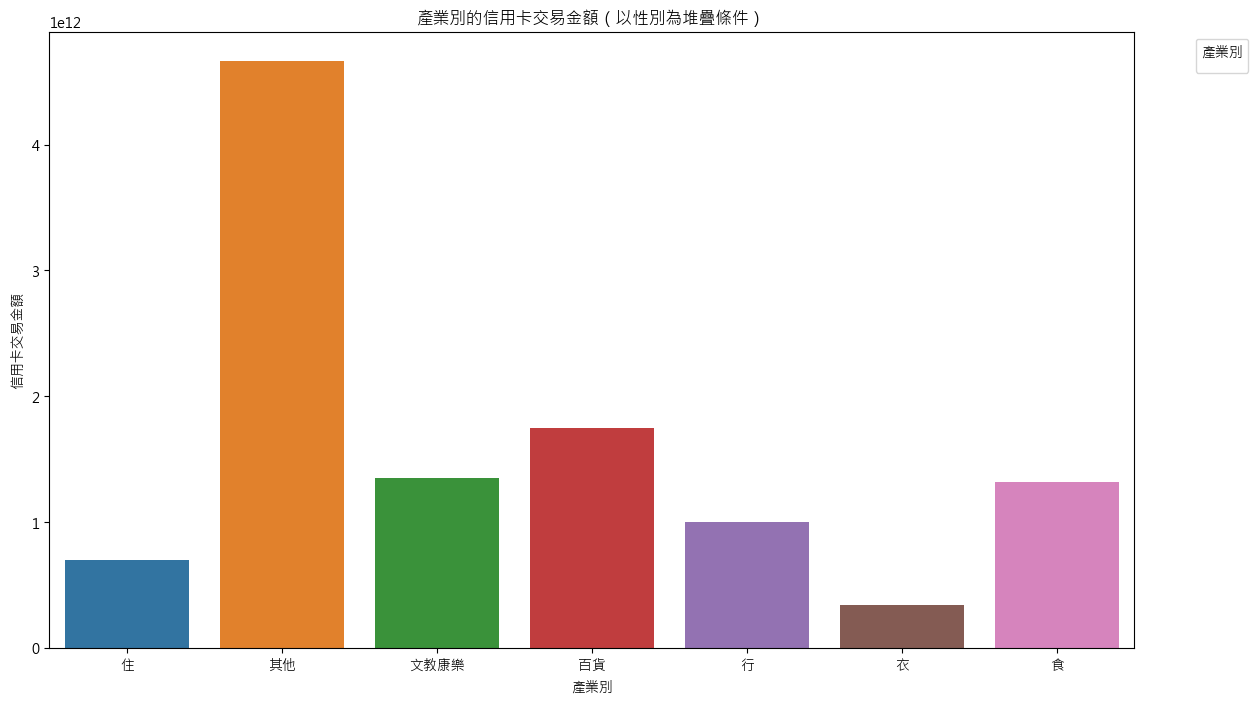

In [30]:
grouped_data = df.groupby(['性別', '產業別'])['信用卡交易金額[新台幣]'].sum().reset_index()

# 繪製堆疊圖
plt.figure(figsize=(14, 8))
sns.barplot(x='產業別', y='信用卡交易金額[新台幣]', hue='產業別', data=grouped_data, ci=None)
plt.title('產業別的信用卡交易金額（以性別為堆疊條件）')
plt.xlabel('產業別')
plt.ylabel('信用卡交易金額')
plt.legend(title='產業別', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

C:\Users\isabe\AppData\Local\Temp\ipykernel_17472\4066691068.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='產業別', y='信用卡交易金額[新台幣]', hue='性別', data=grouped_data, ci=None)


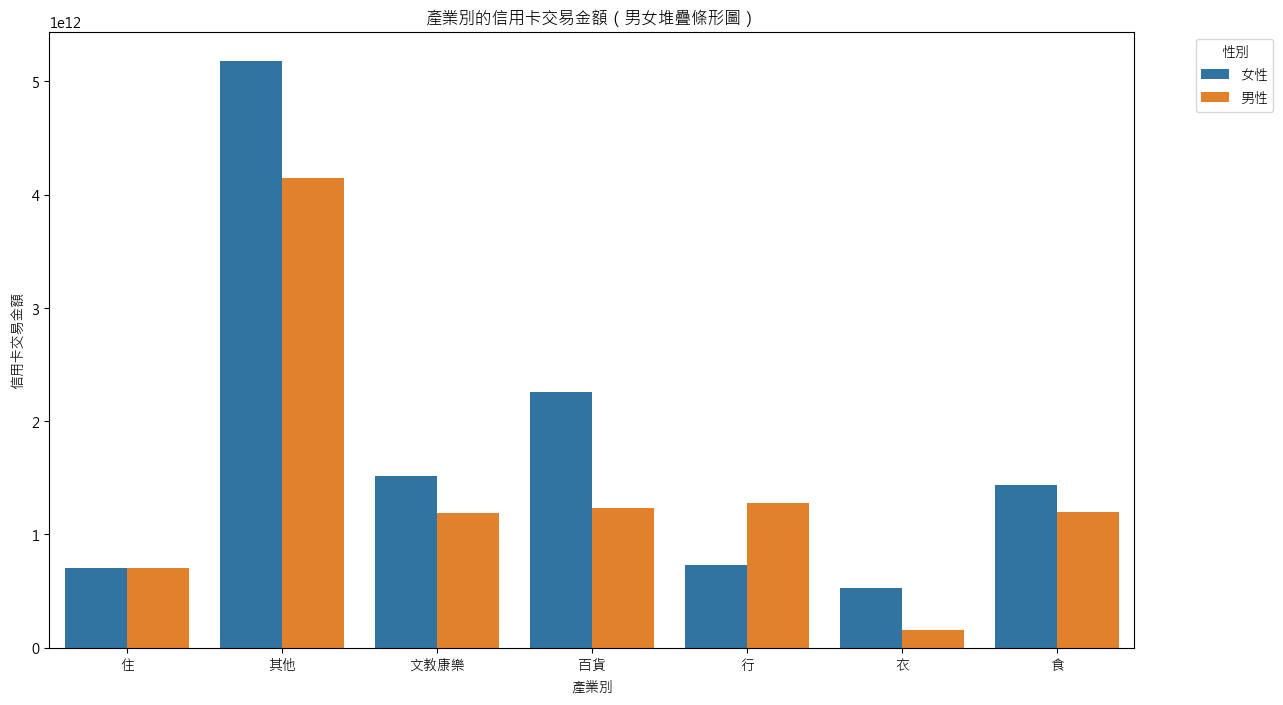

In [35]:

grouped_data = df.groupby(['性別', '產業別'])['信用卡交易金額[新台幣]'].sum().reset_index()

# 使用堆疊圖，x='產業別'，y='信用卡交易金額[新台幣]'，hue='性別'
plt.figure(figsize=(14, 8))
sns.barplot(x='產業別', y='信用卡交易金額[新台幣]', hue='性別', data=grouped_data, ci=None)
plt.title('產業別的信用卡交易金額')
plt.xlabel('產業別')
plt.ylabel('信用卡交易金額')
plt.legend(title='性別', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

C:\Users\isabe\AppData\Local\Temp\ipykernel_17472\2675403776.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='產業別', y='信用卡交易金額[新台幣]', hue='性別', data=grouped_data, ci=None, palette={'男性': 'blue', '女性': 'orange'})


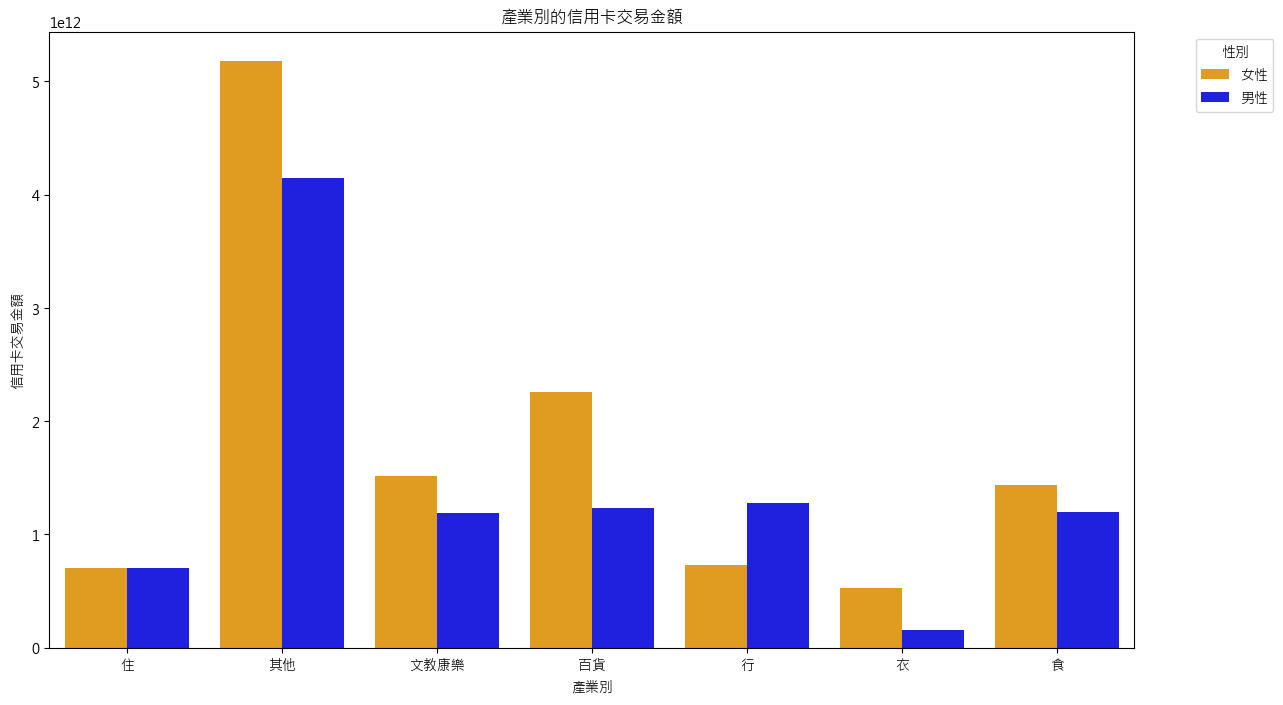

In [33]:
grouped_data = df.groupby(['性別', '產業別'])['信用卡交易金額[新台幣]'].sum().reset_index()

# 繪製堆疊圖，使用不同顏色區分男女
plt.figure(figsize=(14, 8))
sns.barplot(x='產業別', y='信用卡交易金額[新台幣]', hue='性別', data=grouped_data, ci=None, palette={'男性': 'blue', '女性': 'orange'})
plt.title('產業別的信用卡交易金額')
plt.xlabel('產業別')
plt.ylabel('信用卡交易金額')
plt.legend(title='性別', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

C:\Users\isabe\AppData\Local\Temp\ipykernel_17472\3913188557.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='地區', y='信用卡交易金額[新台幣]', hue='產業別', data=filtered_data, ci=None)


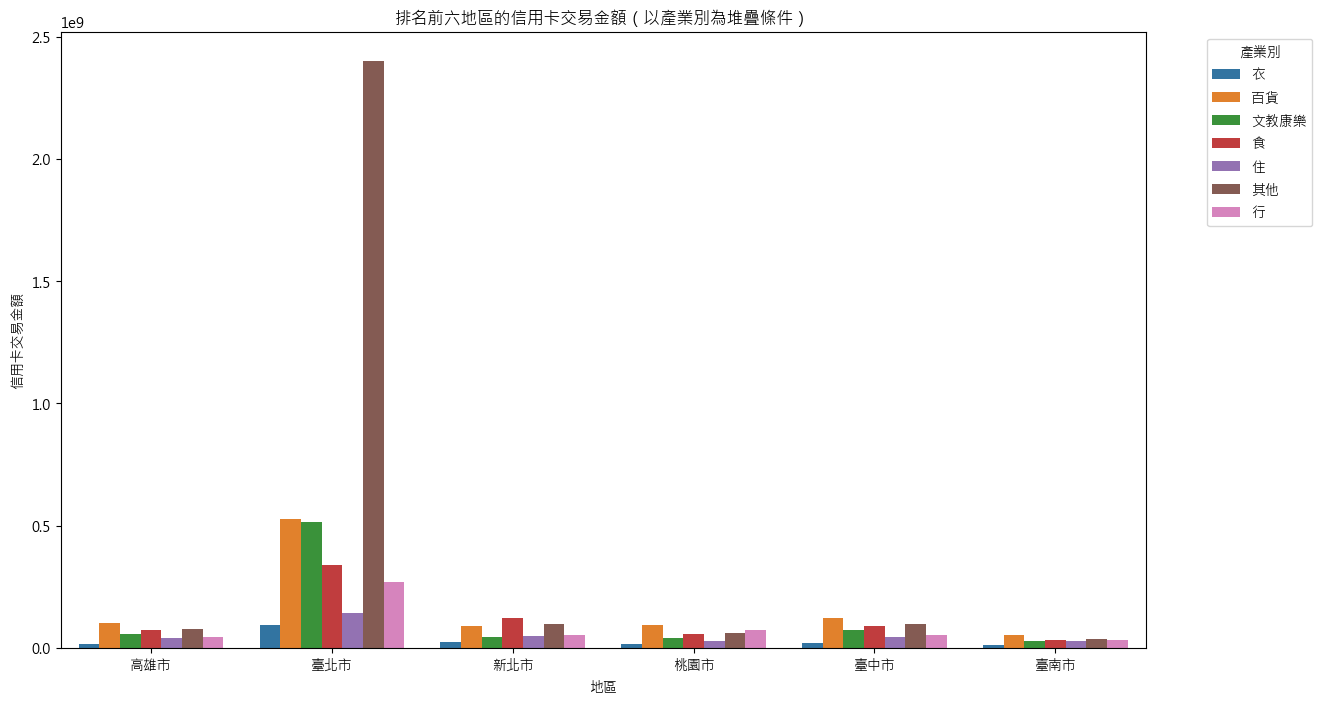

In [36]:
region_total = df.groupby('地區')['信用卡交易金額[新台幣]'].sum().reset_index()

# 選擇排名前六的地區
top_regions = region_total.nlargest(6, '信用卡交易金額[新台幣]')['地區']

# 過濾原始資料，只保留排名前六的地區的資料
filtered_data = df[df['地區'].isin(top_regions)]

# 繪製堆疊圖，x='地區'，y='信用卡交易金額[新台幣]'，hue='產業別'，以性別堆疊
plt.figure(figsize=(14, 8))
sns.barplot(x='地區', y='信用卡交易金額[新台幣]', hue='產業別', data=filtered_data, ci=None)
plt.title('排名前六地區的信用卡交易金額（以產業別為堆疊條件）')
plt.xlabel('地區')
plt.ylabel('信用卡交易金額')
plt.legend(title='產業別', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
grouped_data = df.groupby(['性別', '地區', '產業別'])['信用卡交易金額[新台幣]'].sum().reset_index()

# 繪製堆疊圖
plt.figure(figsize=(14, 8))
sns.barplot(x='地區', y='信用卡交易金額[新台幣]', hue='產業別', data=grouped_data, ci=None)
plt.title('不同地區、產業別的信用卡交易金額（以性別為堆疊條件）')
plt.xlabel('地區')
plt.ylabel('信用卡交易金額')
plt.legend(title='產業別', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

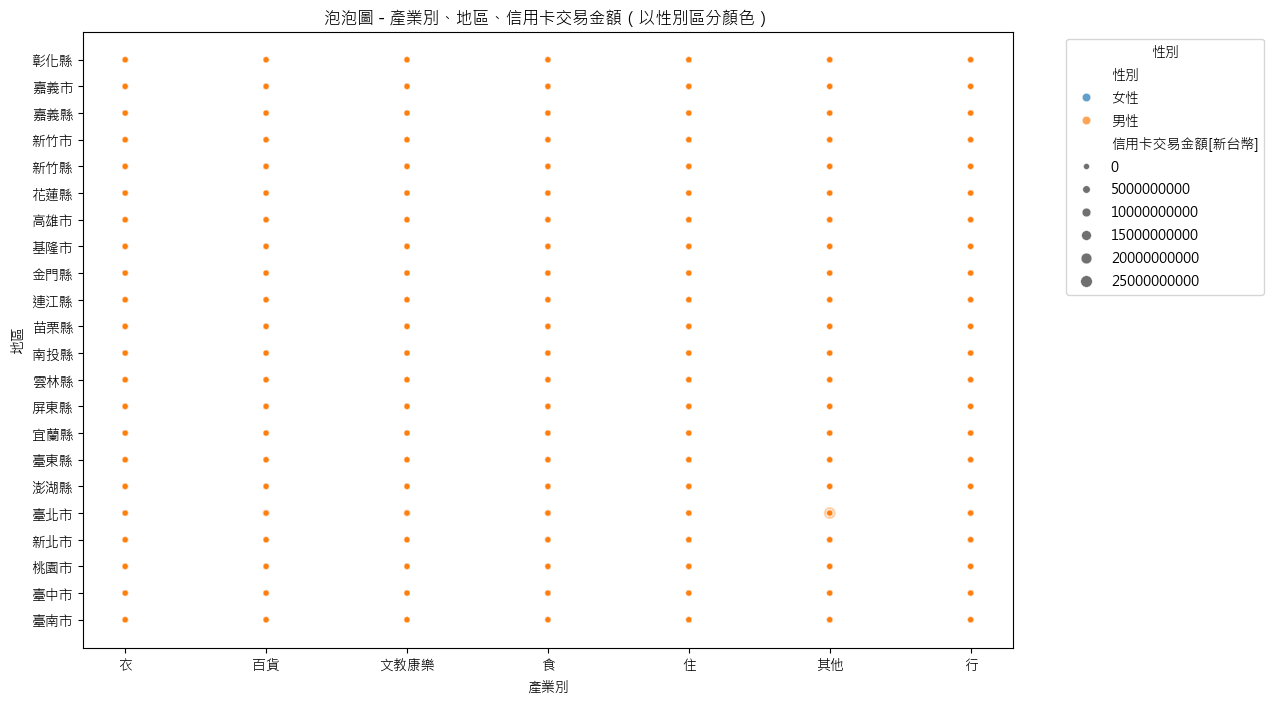

In [38]:
plt.rcParams['font.family'] = 'Microsoft JhengHei'
selected_columns = ['產業別', '地區', '信用卡交易金額[新台幣]', '性別']
selected_data = df[selected_columns]
plt.figure(figsize=(12, 8))
sns.scatterplot(x='產業別', y='地區', size='信用卡交易金額[新台幣]', hue='性別', data=selected_data, alpha=0.7)
plt.title('泡泡圖 - 產業別、地區、信用卡交易金額（以性別區分顏色）')
plt.xlabel('產業別')
plt.ylabel('地區')
plt.legend(title='性別', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

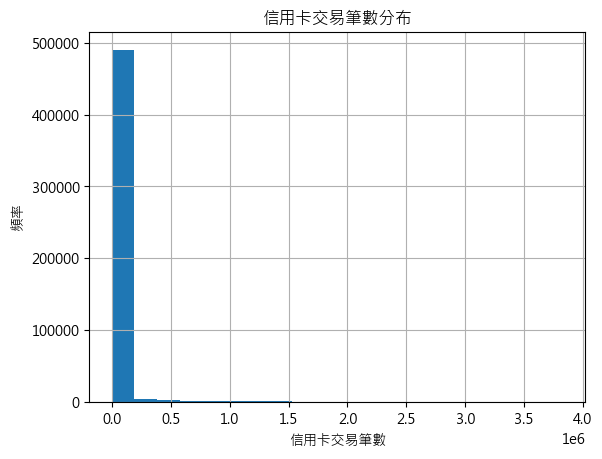

In [14]:
df['信用卡交易筆數'].hist(bins=20)
plt.title('信用卡交易筆數分布')
plt.xlabel('信用卡交易筆數')
plt.ylabel('頻率')
plt.show()

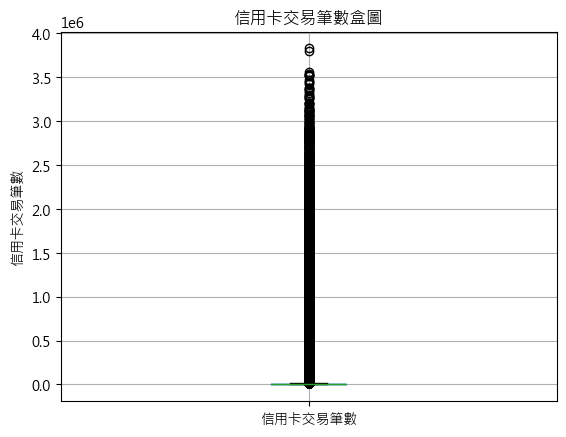

In [16]:
df.boxplot(column='信用卡交易筆數')
plt.title('信用卡交易筆數盒圖')
plt.ylabel('信用卡交易筆數')
plt.show()